In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import random
from matplotlib import pyplot
from numpy import argmax
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
#from mrmr import mrmr_classif
np.random.seed(1234)

In [2]:
################################################################################################################################
#upload the data and create the dataframes
#only the random forest and the optimized XGB are use to ilustrate the MCS concept
################################################################################################################################
y_pred_XGB=pd.read_csv("y_pred_XGB")
y_pred_RF=pd.read_csv("y_pred_RF")
y_test=pd.read_csv("y_test")

In [3]:
#aggregate predictions
y_pred_A=y_pred_XGB+y_pred_RF

In [4]:
#test any positive voting rule (positive if y_pred_A > 0)
ruleany=0
y_pred_any=y_pred_A>ruleany
y_pred_any=y_pred_any.astype('int')

In [5]:
#create the confusion matrix of ruleany
confusion_matrixany = metrics.confusion_matrix(y_test, y_pred_any)

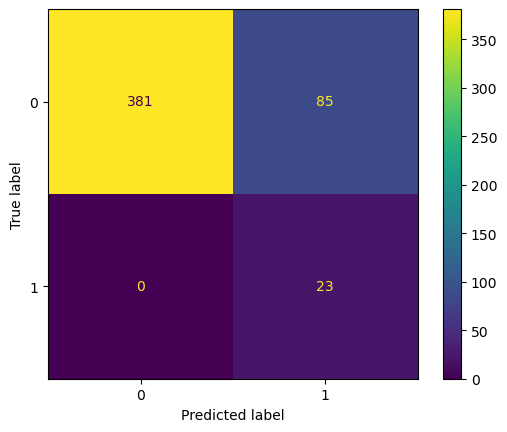

In [6]:
#display the confusion matrix
cm_displayany = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixany)
cm_displayany.plot()
plt.show()

In [7]:
#assign values to the four elements of the confusion matrix
tna,fpa,fna,tpa=metrics.confusion_matrix(y_test, y_pred_any).ravel()

In [8]:
#compute the alpha, beta, and gmeans
alphaa=fpa/(fpa+tna)
betaa=fna/(fna+tpa)
gmeansa=np.sqrt((1-alphaa)*(1-betaa))

In [9]:
#print metrics
print('Alpha:', round(alphaa*100,2), '%')
print('Beta:', round(betaa*100,2), '%')
print('Gmeans:', round(gmeansa,2))

Alpha: 18.24 %
Beta: 0.0 %
Gmeans: 0.9


In [10]:
#test Any majority/unanimous voting rule (positive if y_pred_A > 1)
ruleuna=1
y_pred_una=y_pred_A>ruleuna
y_pred_una=y_pred_una.astype('int')

In [11]:
#create the confusion matrix of ruleuna
confusion_matrixuna = metrics.confusion_matrix(y_test, y_pred_una)

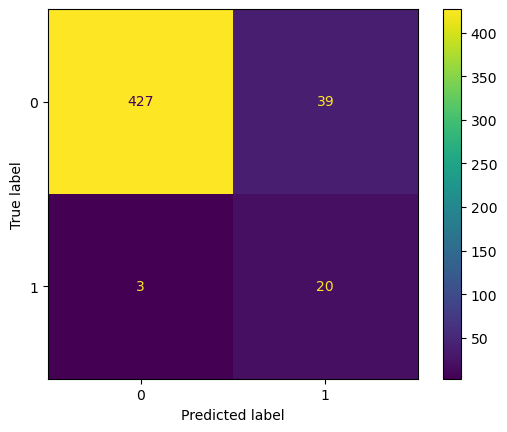

In [12]:
#display the confusion matrix
cm_displayuna = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixuna)
cm_displayuna.plot()
plt.show()

In [13]:
#assign values to the four elements of the confusion matrix
tnu,fpu,fnu,tpu=metrics.confusion_matrix(y_test, y_pred_una).ravel()

In [14]:
#compute the alpha, beta, and gmeans
alphau=fpu/(fpu+tnu)
betau=fnu/(fnu+tpu)
gmeansu=np.sqrt((1-alphau)*(1-betau))

In [15]:
#print metrics
print('Alpha:', round(alphau*100,2), '%')
print('Beta:', round(betau*100,2), '%')
print('Gmeans:', round(gmeansu,2))

Alpha: 8.37 %
Beta: 13.04 %
Gmeans: 0.89
